# Getting Started: PyProcar's Fermi Surface 3D Visualization

This tutorial provides a comprehensive introduction to plotting 3D Fermi surfaces using PyProcar's `FermiHandler` class. You'll learn about the object-oriented approach, visualization modes, interactive features, and advanced configurations.

## What You'll Learn

- **FermiHandler class** and object-oriented approach
- **Different visualization modes** for Fermi surface analysis
- **Interactive features** like sliders and cross-sections
- **Different properties** (Fermi speed, velocity, effective mass)
- **Advanced plotting methods** and their configurations
- **Saving options** for different output formats

## Prerequisites

- Basic understanding of Fermi surfaces and electronic band structures
- PyProcar installed in your environment
- VASP calculation data with sufficient k-point sampling
- 3D visualization capabilities (pyvista)

## Overview of FermiHandler Approach

PyProcar uses an object-oriented approach for 3D Fermi surface visualization through the `FermiHandler` class:

```python
# Step 1: Create FermiHandler object
fermiHandler = pyprocar.FermiHandler(
    code='vasp',           # DFT code used
    dirname='.',           # Directory with calculation files
    apply_symmetry=True    # Apply symmetry operations
)

# Step 2: Call plotting methods
fermiHandler.plot_fermi_surface(mode='plain', show=True)
```

## 1. Setup and Data Loading

Let's start by importing PyProcar and loading example data. We'll use SrVO3 Fermi surface data from a VASP calculation to demonstrate all the features. For Fermi surface calculations, we need a dense k-point mesh that includes the Fermi energy.

In [1]:
# Import required libraries
from pathlib import Path
import pyprocar
import pyvista as pv

pv.set_jupyter_backend('static')

CURRENT_DIR = Path(".").resolve()
REL_PATH = "data/examples/fermi3d/non-spin-polarized"
pyprocar.download_from_hf(relpath=REL_PATH, output_path=CURRENT_DIR)
DATA_DIR = CURRENT_DIR / REL_PATH
print(f"Data downloaded to: {DATA_DIR}")

Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\04-fermi3d\data\examples\fermi3d\non-spin-polarized
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\04-fermi3d\data\examples\fermi3d\non-spin-polarized


## 2. FermiHandler Class Overview

The `FermiHandler` class is the main interface for 3D Fermi surface visualization. Here's how it works:

### Creating a FermiHandler Object

| Argument | Type | Description | Example |
|----------|------|-------------|---------|
| `code` | str | DFT software used | `'vasp'`, `'qe'`, `'abinit'` |
| `dirname` | str | Path to calculation files | `'.'`, `'/path/to/data'` |
| `apply_symmetry` | bool | Apply symmetry operations | `True` |
| `fermi` | float | Fermi energy (eV) | `5.599` |

### Main Plotting Methods

| Method | Purpose | Key Arguments |
|--------|---------|---------------|
| `plot_fermi_surface()` | Basic Fermi surface plotting | `mode`, `atoms`, `orbitals`, `spins` |
| `plot_fermi_isoslider()` | Interactive energy slider | `iso_range`, `iso_surfaces` |
| `create_isovalue_gif()` | Animated GIF creation | `save_gif`, `iso_range` |
| `plot_fermi_cross_section()` | Cross-section analysis | `slice_normal`, `slice_origin` |



## 3. Creating Your First FermiHandler

Let's start by creating a `FermiHandler` object and exploring the basic functionality. This object will handle all the data loading and processing.

In [2]:
# Create FermiHandler object - this loads and processes the data
fermiHandler = pyprocar.FermiHandler(
    code="vasp",           # Required: DFT software used
    dirname=DATA_DIR,      # Required: Directory with calculation files  
    use_cache=False,
    fermi=5.3017,          # Fermi energy in eV
    verbose=0
)

print("✅ FermiHandler object created successfully!")
print("   - Data loaded and processed")
print("   - Ready for 3D visualization")

 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- Sobhit Singh
- Uthpala Herath
- Pedram Tavadze
- Eric Bousquet
- Xu He
- Reese Boucher
- Logan Lang
- Freddy Farah
    
✅ FermiHandler object created successful

## 4. Basic Fermi Surface Plotting - Plain Mode

Now let's create our first 3D Fermi surface plot using the `plot_fermi_surface()` method in **plain mode**. This shows the basic isosurfaces at the Fermi energy with different colors for different bands.


None


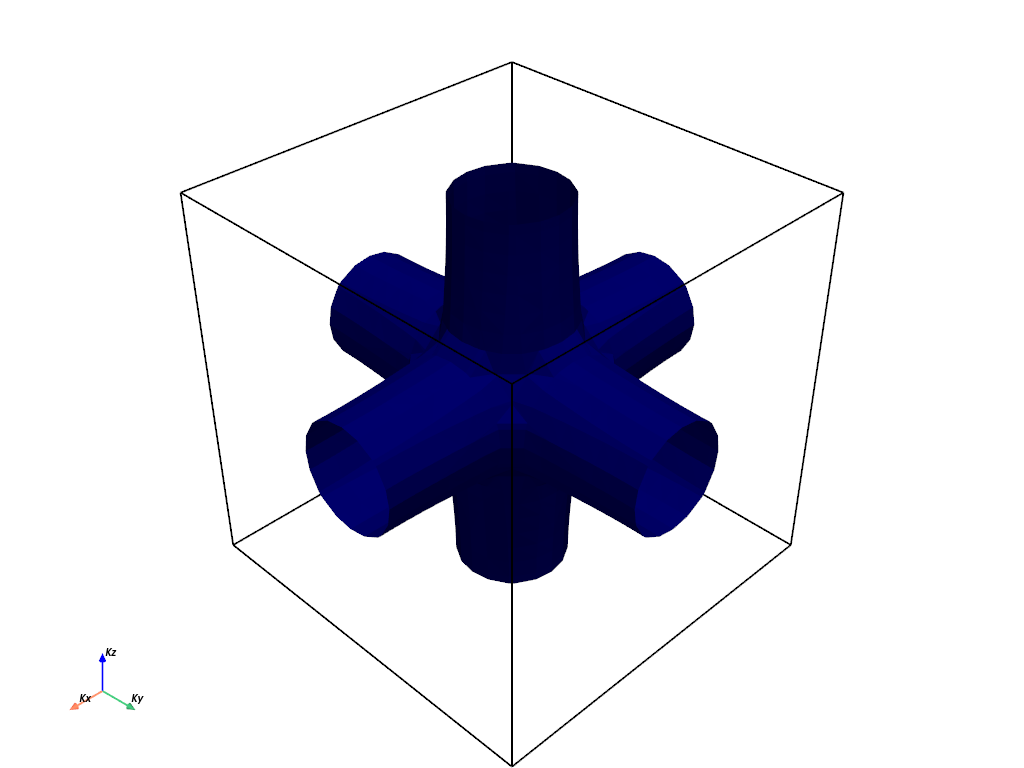

✅ Plain mode: Basic 3D Fermi surface with band colors


In [3]:
# Plot basic Fermi surface in plain mode
fermiHandler.plot_fermi_surface(
    mode="plain",
    show=True
)

print("✅ Plain mode: Basic 3D Fermi surface with band colors")


## 5. Visualization Modes Overview

PyProcar offers several visualization modes for 3D Fermi surface analysis:

| Mode | Purpose | Key Arguments | Use Case |
|------|---------|---------------|----------|
| `'plain'` | Basic Fermi surface | None extra | General overview, band colors |
| `'parametric'` | Projected Fermi surface | `atoms`, `orbitals`, `spins` | Analyzing orbital/atomic contributions |
| `'spin_texture'` | Spin-polarized surface | `atoms`, `orbitals`, `spins` | Spin-resolved analysis |

## 6. Parametric Mode - Projected Fermi Surfaces

**Parametric mode** shows atomic/orbital contributions on the Fermi surface through color mapping.

### Atom Indexing Reference

The atoms are index by the order their listed in the input file

- **Sr**: 0
- **V**: 1 
- **O**: 2,3,4

### Orbital Indexing Reference
- **s**: 0
- **p**: 1, 2, 3 (px, py, pz)  
- **d**: 4, 5, 6, 7, 8 (d orbitals)
- **f**: 9, 10, 11, 12, 13, 14, 15 (f orbitals)

projected_sum


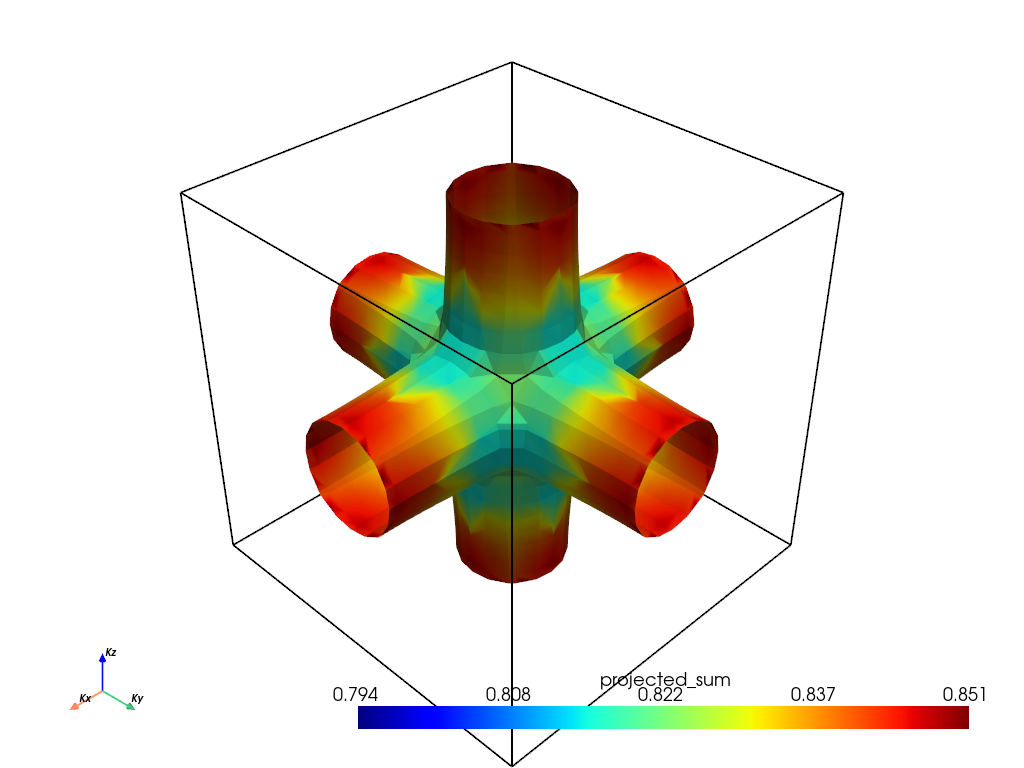

📊 Parametric mode: Color mapping shows d-orbital contributions on Fermi surface


In [4]:
# Parametric mode - showing orbital contributions on Fermi surface
atoms = [1]           # Atom index for Vanadium atom
orbitals = [4,5,6,7,8]  # d orbitals (indices 4-8)
spins = [0]           # Spin channel

fermiHandler.plot_fermi_surface(
    mode="parametric",
    atoms=atoms,
    orbitals=orbitals,
    spins=spins,
    show=True
)

print("📊 Parametric mode: Color mapping shows d-orbital contributions on Fermi surface")

## 8. Interactive Features - Sliders and Cross-Sections

Fermi3D offers powerful interactive features for detailed analysis:

### Available Interactive Features
- **Isoslider**: Vary energy around Fermi level to see how surfaces evolve
- **Cross-sections**: Cut through the Fermi surface to see 2D slices
- **Box widget**: Interactive box for complex cross-sections
- **Rotation and zoom**: Full 3D interaction with the surface

Interactive energy slider:


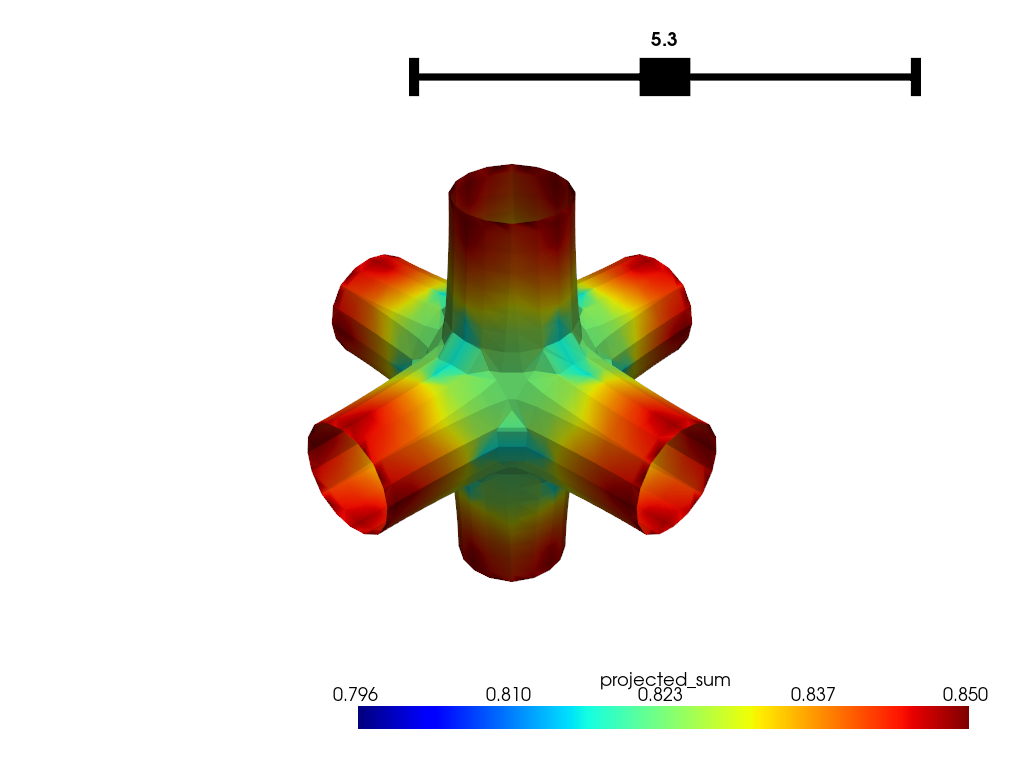

In [5]:
# Isoslider - interactive energy slider
print("Interactive energy slider:")
iso_range = 0.5    # Energy range: ±0.5 eV around Fermi  
iso_surfaces = 10  # Number of surfaces to calculate

fermiHandler.plot_fermi_isoslider(
    iso_range=iso_range,
    iso_surfaces=iso_surfaces,
    iso_values=None, # You can also provide exact isovalues
    mode="parametric",
    atoms=[1],
    orbitals=[4,5,6,7,8],
    spins=[0],
    show=True
)



### Isovalues GIF

In [6]:
# Create isovalue GIF (varying energy levels)
iso_range = 1.0  # Energy range: ±1.0 eV around Fermi
iso_surfaces = 3  # Number of surfaces

fermiHandler.create_isovalue_gif(
    iso_range=iso_range,
    iso_surfaces=iso_surfaces,
    save_gif=DATA_DIR / "fermi_isovalue.gif",
    mode="plain"
)


### Cross Section Widget

Cross-section visualization:


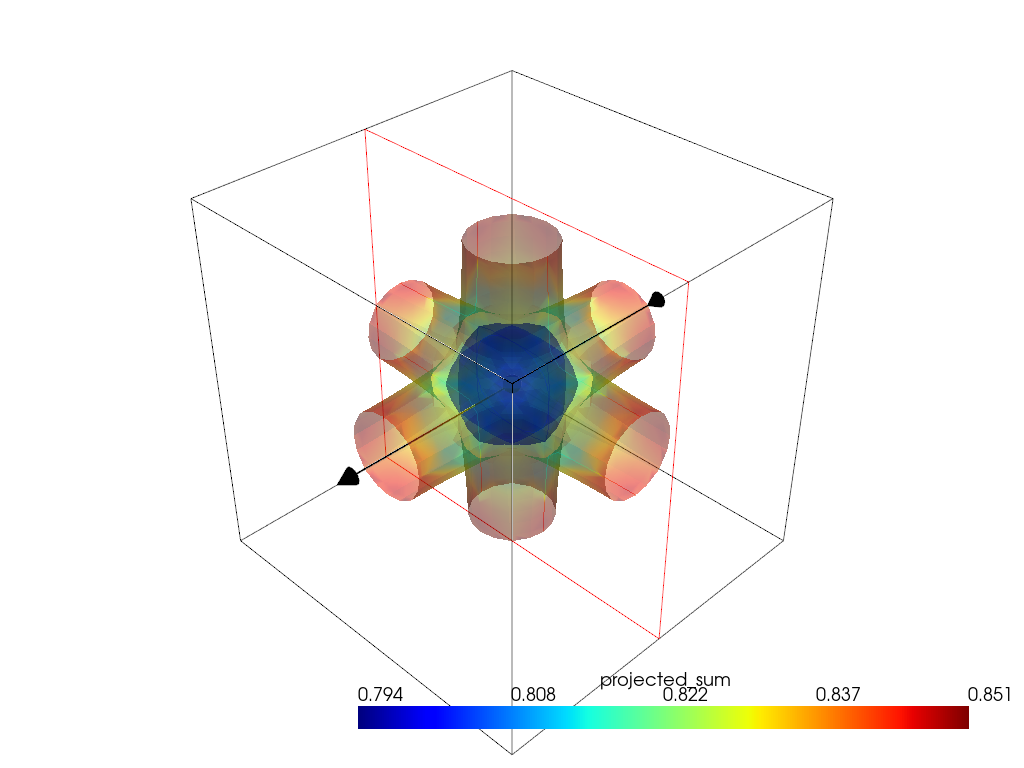

🎛️ Interactive features: Sliders and cross-sections provide detailed analysis


In [3]:
# Cross-section - cut through the Fermi surface
print("Cross-section visualization:")
slice_normal = (1, 0, 0)    # Cut along x-direction
slice_origin = (0, 0, 0)    # Cut through origin

fermiHandler.plot_fermi_cross_section(
    slice_normal=slice_normal,
    slice_origin=slice_origin,
    mode="parametric",
    atoms=[1],
    orbitals=[4,5,6,7,8],
    spins=[0],
    surface_opacity=0.5,
    show=True
)

print("🎛️ Interactive features: Sliders and cross-sections provide detailed analysis")

## 9. Plotting Configurations - Customizing 3D Appearance

PyProcar provides extensive options to customize 3D Fermi surface appearance:

### Key Configuration Arguments

| Category | Arguments | Description |
|----------|-----------|-------------|
| **Surface** | `surface_cmap`, `surface_opacity` | Surface colors and transparency |
| **Camera** | `camera_pos`, `background_color` | View angle and background |
| **Brillouin** | `show_brillouin_zone`, `brillouin_zone_color` | Show/style unit cell |
| **Properties** | `texture_cmap`, `arrow_size` | Property visualization |
| **Output** | `save_3d`, `save_gif`, `save_mp4` | Save 3D formats |

In [25]:
fermiHandler = pyprocar.FermiHandler(
    code="vasp",           # Required: DFT software used
    dirname=DATA_DIR,      # Required: Directory with calculation files  
    apply_symmetry=True,   # Apply symmetry operations (if available)
    fermi=5.3017,          # Fermi energy in eV
    verbose=1
)
# Print available configuration options
fermiHandler.plot_fermi_surface(
    mode="plain", 
    print_plot_opts=True,
    show=False  # Don't show plot, just print options
)

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

### Example 1: Customizing surface appearance

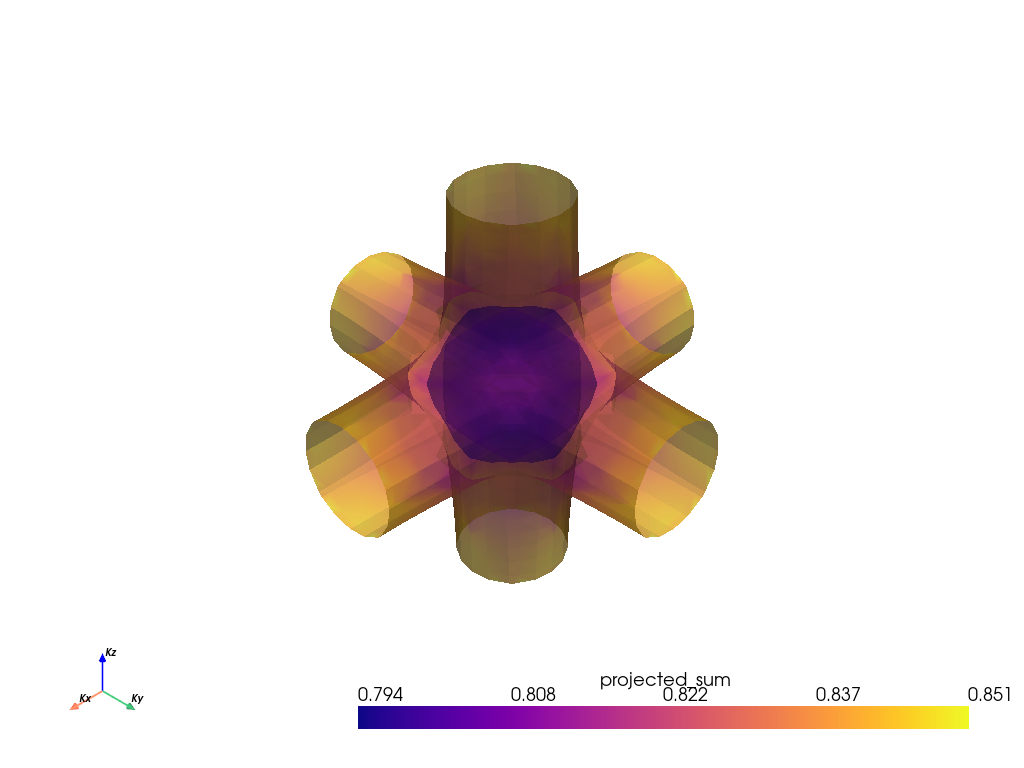

🎨 Configuration options allow full customization of 3D appearance


In [4]:

fermiHandler.plot_fermi_surface(
    mode="parametric", 
    surface_cmap="plasma",        # Different colormap
    surface_opacity=0.8,          # Semi-transparent surface
    background_color="grey",     # Dark background
    show_brillouin_zone=False,     # Show unit cell
    atoms=[1],
    orbitals=[4,5,6,7,8],
    spins=[0],
    show=True
)


print("🎨 Configuration options allow full customization of 3D appearance")

### Example 2: Customizing surface appearance

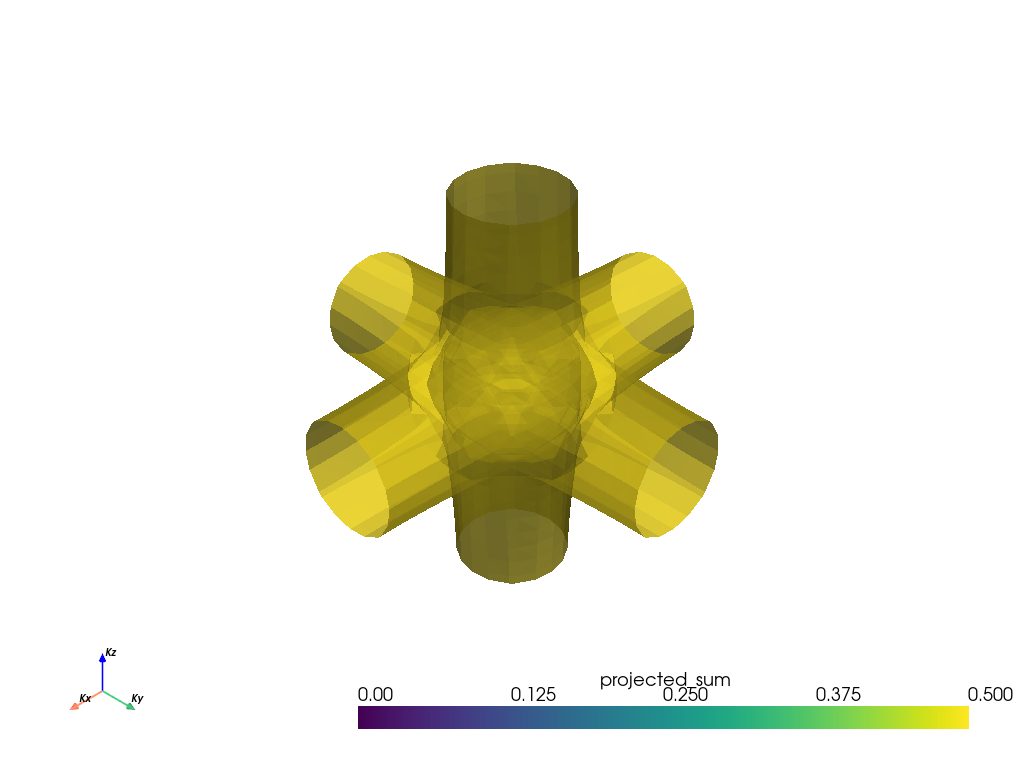

In [5]:
# Example 2: Customizing parametric visualization
atoms = [1]
orbitals = [4,5,6,7,8]
spins = [0]

fermiHandler.plot_fermi_surface(
    mode="parametric",
    atoms=atoms,
    orbitals=orbitals,
    spins=spins,
    surface_cmap="viridis",     # Different colormap
    surface_clim=[0, 0.5],      # Color scale limits  
    surface_opacity=0.9,        # Slight transparency
    plotter_camera_pos=[2, 2, 2],  # Custom camera angle
    show=True
)


## 10. Saving and Output Options

PyProcar provides several options for saving 3D Fermi surfaces in different formats.

### Save Options

In [28]:
# Save interactive GIF animation
atoms = [1]
orbitals = [4,5,6,7,8]
spins = [0]

fermiHandler.plot_fermi_surface(
    mode="parametric",
    atoms=atoms,
    orbitals=orbitals,
    spins=spins,
    save_gif=DATA_DIR / "fermi_surface_rotation.gif",  # Rotating GIF
    show=False
)


print("💾 3D Fermi surfaces saved as:")
print("   - fermi_surface.vtp (3D mesh)")
print("   - fermi_surface_rotation.gif (rotating animation)")

____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
💾 3D Fermi surfaces saved as:
   - fermi_surface.vtp (3D mesh)
   - fermi_surface_rotation.gif (rotating animation)


In [6]:
# Save as 3D mesh for later use
fermiHandler.plot_fermi_surface(
    mode="parametric",
    atoms=[1],
    orbitals=[4,5,6,7,8],
    spins=[0],
    save_3d=DATA_DIR / "fermi_surface.vtp",  # Save 3D mesh
    show=False  # Don't show, just save
)

## Summary: Mastering PyProcar's FermiHandler

🎉 **Congratulations!** You've learned the complete `FermiHandler` class and its methods:

### Core Concepts Covered
1. **FermiHandler object**: Object-oriented approach to Fermi surface analysis
2. **Visualization modes**: `plain`, `parametric`, `spin_texture`
3. **Plotting methods**: `plot_fermi_surface()`, `plot_fermi_isoslider()`, `plot_fermi_cross_section()`
4. **Interactive features**: Isosliders, cross-sections, 3D manipulation
5. **Configurations**: Customize 3D appearance with colors, opacity, camera
6. **Output options**: Save as 3D meshes, GIFs, and animations

### 💡 Key Takeaways

| Concept | Key Points |
|---------|------------|
| **Object Creation** | `FermiHandler(code, dirname, apply_symmetry, fermi)` |
| **Basic Plotting** | `plot_fermi_surface(mode, atoms, orbitals, spins)` |
| **Interactive** | `plot_fermi_isoslider()`, `plot_fermi_cross_section()` |
| **Animation** | `create_isovalue_gif()` for energy variations |
| **Configuration** | Use kwargs for `surface_cmap`, `opacity`, etc. |
| **Best Practices** | Dense k-mesh required, object-oriented approach |

### 🚀 Quick Reference

```python
# Step 1: Create FermiHandler object
fermiHandler = pyprocar.FermiHandler(code='vasp', dirname='.', 
                                   apply_symmetry=True, fermi=E_F)

# Step 2: Basic plotting
fermiHandler.plot_fermi_surface(mode='plain', show=True)

# Step 3: With projections  
fermiHandler.plot_fermi_surface(mode='parametric', atoms=[0], 
                               orbitals=[4,5,6,7,8], spins=[0])

# Step 4: Interactive features
fermiHandler.plot_fermi_isoslider(iso_range=1.0, iso_surfaces=20, mode='plain')
fermiHandler.plot_fermi_cross_section(slice_normal=(1,0,0), mode='plain')

# Step 5: Create animations
fermiHandler.create_isovalue_gif(iso_range=1.0, save_gif='animation.gif')
```
